In [1]:
import numpy as np
import matplotlib.pyplot as plt

from modelbase.ode import Model, LabelModel, LinearLabelModel, Simulator, mca
from modelbase.ode import ratefunctions as rf

In [2]:

W = Model()

In [3]:
W.add_compounds([
    "B",     # Biomass (g/m^2)
    "LAI",   # Leaf Area Index
    "TT"     # Thermal Time (degree-days)
])


In [4]:
p={
 "radiation" : 5, #daily solar radiation # MJm-²d-1
    "K": 0.7,             # Light extinction coefficient
    "RUE": 1.85,           # Radiation Use Efficiency (g/MJ-1)
    "alpha": 0.00243,         # Relative rate of LAI increase
    "LAI_max": 7,       # Maximum Leaf Area Index
    "T_base": 7,          # Base temperature (°C)
    "TTM": 1200,           # Thermal time threshold for crop maturity (°C d)
    "TTL": 700,           # Thermal time threshold for end of vegetative phase (°C d)
}

In [5]:
W.add_parameters(p)

In [6]:
# thermal time (age) accumulation
def thermal_time(Tmax, Tmin, T_base):
    return max((Tmax + Tmin) / 2 - T_base, 0)

# biomass growth 
def biomass_growth(RUE, K,LAI, radiation, TT, TTM):
    if TT <= TTM:
        return RUE * (1 - (2.718 ** (-K * LAI))) * radiation
    else:
        return 0

# LAI growth 
def lai_growth(LAI, TT, TTL, alpha, LAI_max):
    if TT <= TTL:
        return alpha * LAI * (LAI_max - LAI)
    else:
        return 0


In [7]:
# Thermal time reaction (TT)
W.add_reaction_from_args(
    rate_name='thermal_time',
    function=thermal_time,
    stoichiometry={'TT': 1},  # TT increases over time
    args=['Tmax', 'Tmin', 'T_base']
)

# Biomass accumulation reaction (B)
W.add_reaction_from_args(
    rate_name='dB',
    function=biomass_growth,
    stoichiometry={'B': 1},  # Biomass increases
    args=["RUE","K","LAI","radiation","TT","TTM"]
)

# LAI growth reaction
W.add_reaction_from_args(
    rate_name='lai_growth',
    function=lai_growth,
    stoichiometry={'LAI': 1},  # LAI increases
    args=['LAI', 'TT', 'TTL', 'alpha', 'LAI_max']
)

In [8]:
# Example weather data for 10 days (Tmax, Tmin)
Tmax_data = [30, 31, 29, 28, 32, 33, 34, 31, 30, 29]  # Max temperatures (°C)
Tmin_data = [20, 19, 21, 18, 22, 21, 20, 19, 18, 21]  # Min temperatures (°C)

for day in range(10):
    Tmax = Tmax_data[day]
    Tmin = Tmin_data[day]
    parameters = {'Tmax': Tmax, 'Tmin': Tmin}
    W.update_parameters(parameters)  

(<Figure size 1000x700 with 1 Axes>,
 <Axes: xlabel='Remember to label your axes', ylabel='Remember to label your axes'>)

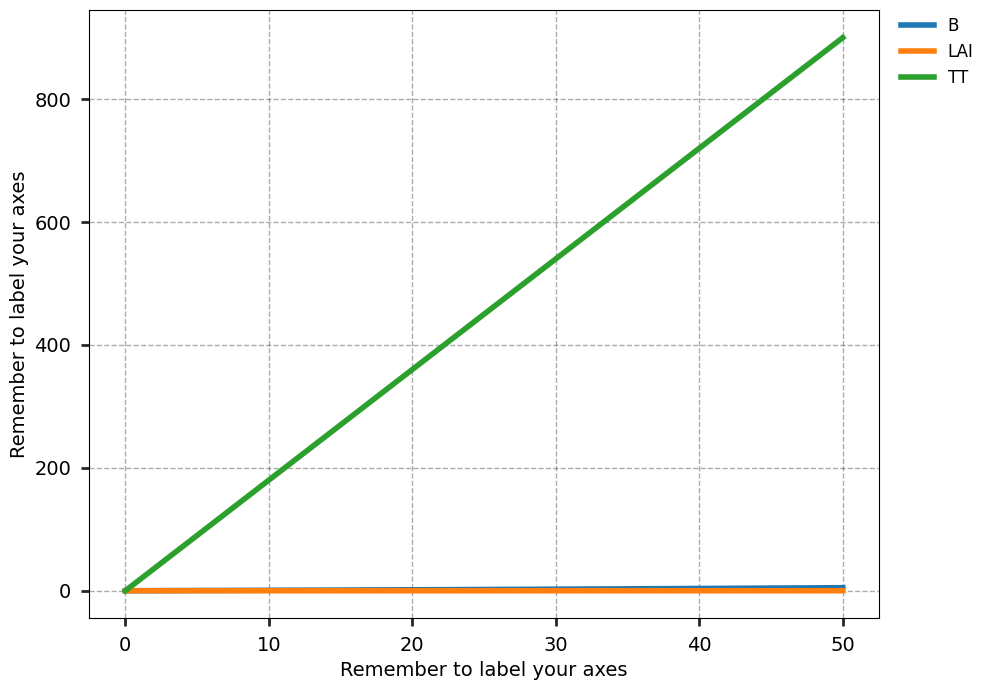

In [9]:
s=Simulator(W)
s.initialise ({"TT":0,"LAI":0.01,"B":0.0})

s.simulate(50)
s.plot_all()



In [10]:
print(s.results) 


[array([[0.00000000e+00, 1.00000000e-02, 0.00000000e+00],
       [3.27241277e-02, 1.00861548e-02, 9.09090909e+00],
       [6.57291935e-02, 1.01730509e-02, 1.81818182e+01],
       [9.90175977e-02, 1.02606944e-02, 2.72727273e+01],
       [1.32591756e-01, 1.03490920e-02, 3.63636364e+01],
       [1.66454108e-01, 1.04382499e-02, 4.54545455e+01],
       [2.00607117e-01, 1.05281748e-02, 5.45454545e+01],
       [2.35053261e-01, 1.06188733e-02, 6.36363636e+01],
       [2.69795044e-01, 1.07103518e-02, 7.27272727e+01],
       [3.04834988e-01, 1.08026173e-02, 8.18181818e+01],
       [3.40175637e-01, 1.08956763e-02, 9.09090909e+01],
       [3.75819564e-01, 1.09895356e-02, 1.00000000e+02],
       [4.11769358e-01, 1.10842023e-02, 1.09090909e+02],
       [4.48027625e-01, 1.11796832e-02, 1.18181818e+02],
       [4.84596998e-01, 1.12759852e-02, 1.27272727e+02],
       [5.21480132e-01, 1.13731153e-02, 1.36363636e+02],
       [5.58679702e-01, 1.14710808e-02, 1.45454545e+02],
       [5.96198410e-01, 1.1569

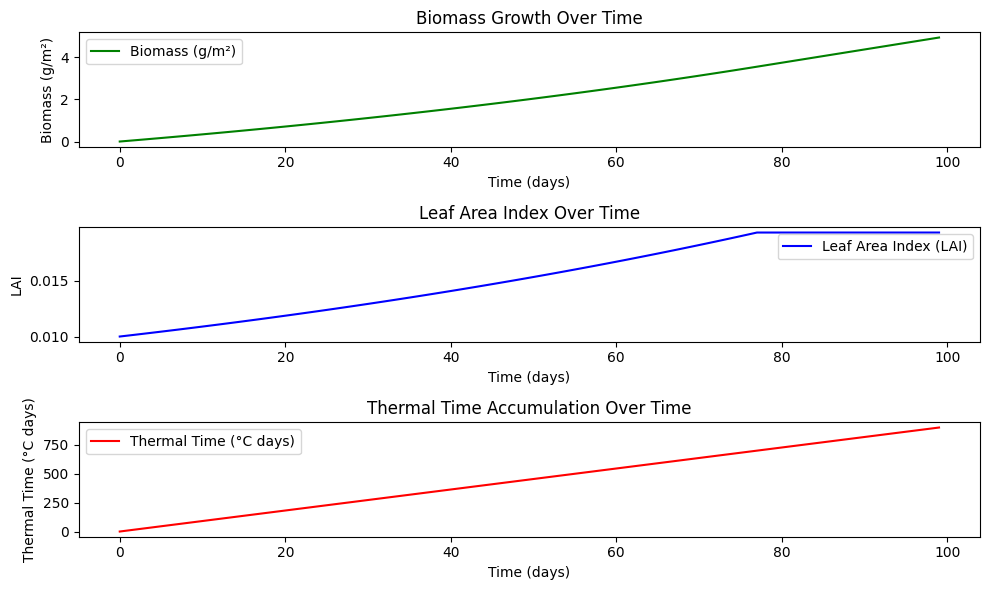

In [22]:

result_array = s.results[0] 

# Extract Biomass (B), LAI, and Thermal Time (TT) from the array columns
biomass = result_array[:, 0]      # First column is biomass
lai = result_array[:, 1]          # Second column is LAI
thermal_time = result_array[:, 2]  # Third column is Thermal Time

# Time points (number of rows in the array)
time_points = np.arange(len(biomass))

# Plotting the results
plt.figure(figsize=(10, 6))

# Biomass plot
plt.subplot(3, 1, 1)
plt.plot(time_points, biomass, 'g-', label="Biomass (g/m²)")
plt.xlabel("Time (days)")
plt.ylabel("Biomass (g/m²)")
plt.title("Biomass Growth Over Time")
plt.legend()

# LAI plot
plt.subplot(3, 1, 2)
plt.plot(time_points, lai, 'b-', label="Leaf Area Index (LAI)")
plt.xlabel("Time (days)")
plt.ylabel("LAI")
plt.title("Leaf Area Index Over Time")
plt.legend()

# Thermal Time plot
plt.subplot(3, 1, 3)
plt.plot(time_points, thermal_time, 'r-', label="Thermal Time (°C days)")
plt.xlabel("Time (days)")
plt.ylabel("Thermal Time (°C days)")
plt.title("Thermal Time Accumulation Over Time")
plt.legend()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


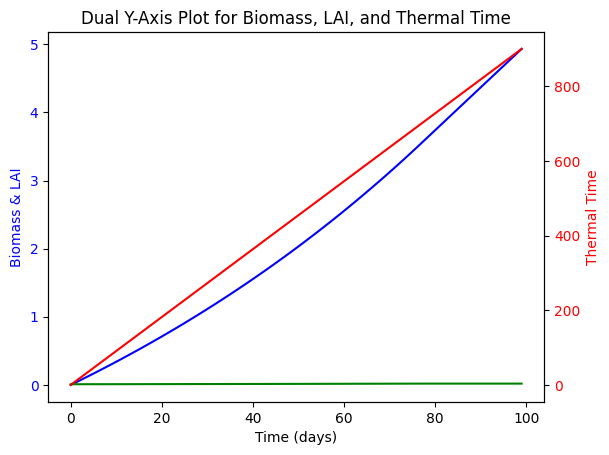

In [12]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Time (days)")
ax1.set_ylabel("Biomass & LAI", color="blue")
ax1.plot(time_points, biomass, 'b-', label="Biomass")
ax1.plot(time_points, lai, 'g-', label="LAI")
ax1.tick_params(axis='y', labelcolor="blue")

ax2 = ax1.twinx()  # Create a second y-axis #twinx
ax2.set_ylabel("Thermal Time", color="red")
ax2.plot(time_points, thermal_time, 'r-', label="Thermal Time")
ax2.tick_params(axis='y', labelcolor="red")

plt.title("Dual Y-Axis Plot for Biomass, LAI, and Thermal Time")
plt.show()

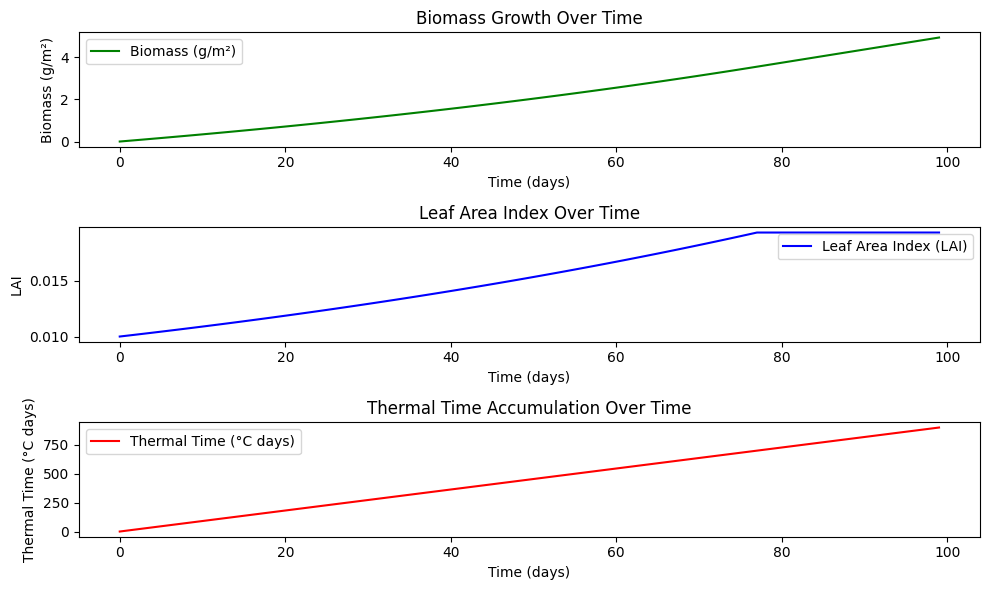

In [24]:

result_array = s.results[0] 

# Extract Biomass (B), LAI, and Thermal Time (TT) from the array columns
biomass = result_array[:, 0]      # First column is biomass
lai = result_array[:, 1]          # Second column is LAI
thermal_time = result_array[:, 2]  # Third column is Thermal Time

# Time points (number of rows in the array)
time_points = np.arange(len(biomass))

# Plotting the results
plt.figure(figsize=(10, 6))

# Biomass plot
plt.subplot(3, 1, 1)
plt.plot(time_points, biomass, 'g-', label="Biomass (g/m²)")
plt.xlabel("Time (days)")
plt.ylabel("Biomass (g/m²)")
plt.title("Biomass Growth Over Time")
plt.legend()

# LAI plot
plt.subplot(3, 1, 2)
plt.plot(time_points, lai, 'b-', label="Leaf Area Index (LAI)")
plt.xlabel("Time (days)")
plt.ylabel("LAI")
plt.title("Leaf Area Index Over Time")
plt.legend()

# Thermal Time plot
plt.subplot(3, 1, 3)
plt.plot(time_points, thermal_time, 'r-', label="Thermal Time (°C days)")
plt.xlabel("Time (days)")
plt.ylabel("Thermal Time (°C days)")
plt.title("Thermal Time Accumulation Over Time")
plt.legend()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


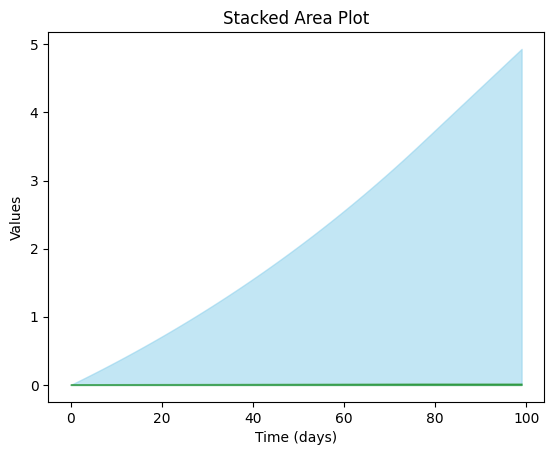

In [13]:
plt.fill_between(time_points, biomass, color="skyblue", alpha=0.5)
plt.fill_between(time_points, lai, color="green", alpha=0.5)

plt.title("Stacked Area Plot")
plt.xlabel("Time (days)")
plt.ylabel("Values")
plt.show()


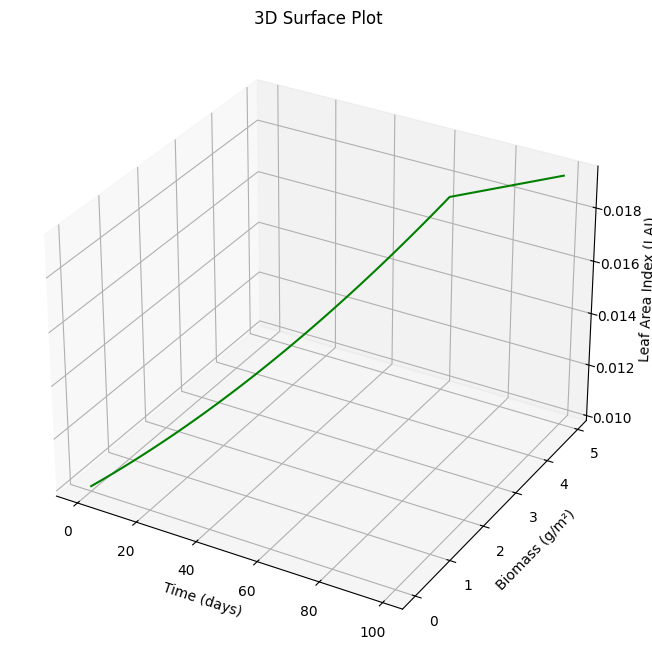

In [14]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot3D(time_points, biomass, lai, 'green')

ax.set_ylabel('Biomass (g/m²)')

ax.set_zlabel('Leaf Area Index (LAI)')
ax.set_xlabel('Time (days)')
plt.title("3D Surface Plot")
plt.show()


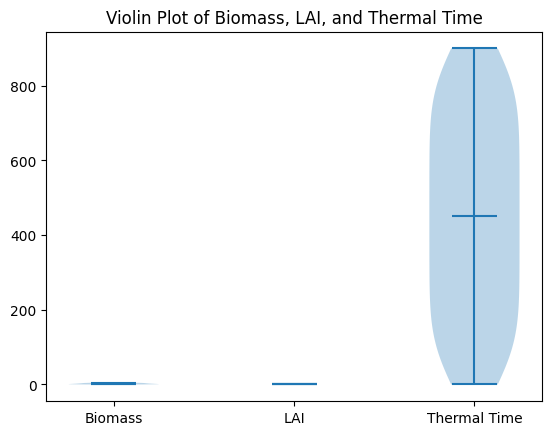

In [15]:
data = [biomass, lai, thermal_time]
plt.violinplot(data, showmedians=True)
plt.xticks([1, 2, 3], ["Biomass", "LAI", "Thermal Time"])
plt.title("Violin Plot of Biomass, LAI, and Thermal Time")
plt.show()



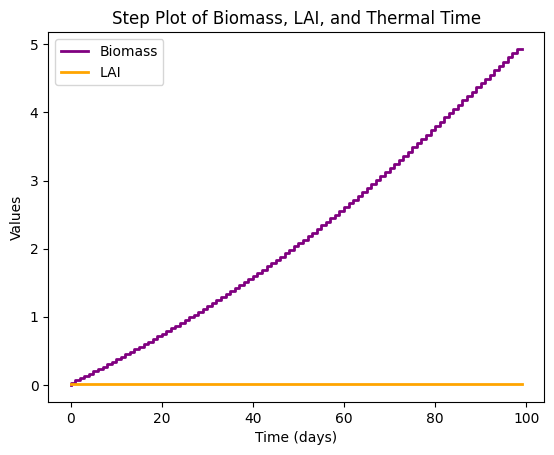

In [16]:
plt.step(time_points, biomass, label="Biomass", color="purple", linewidth=2)
plt.step(time_points, lai, label="LAI", color="orange", linewidth=2)

plt.title("Step Plot of Biomass, LAI, and Thermal Time")
plt.xlabel("Time (days)")
plt.ylabel("Values")
plt.legend()
plt.show()


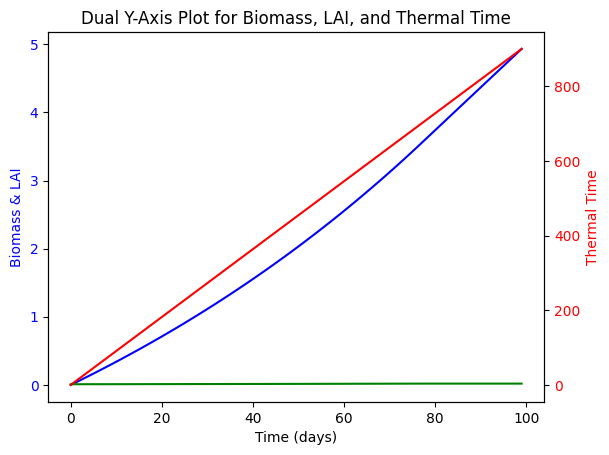

In [18]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Time (days)")
ax1.set_ylabel("Biomass & LAI", color="blue")
ax1.plot(time_points, biomass, 'b-', label="Biomass")
ax1.plot(time_points, lai, 'g-', label="LAI")
ax1.tick_params(axis='y', labelcolor="blue")

ax2 = ax1.twinx()  # Create a second y-axis
ax2.set_ylabel("Thermal Time", color="red")
ax2.plot(time_points, thermal_time, 'r-', label="Thermal Time")
ax2.tick_params(axis='y', labelcolor="red")

plt.title("Dual Y-Axis Plot for Biomass, LAI, and Thermal Time")
plt.show()
